This notebook performs Exploratory Data Analysis (EDA) on the "toledo_2010.xlsx" dataset to understand the distribution of variables, identify possible anomalies and calculate the correlation between social exclusion indicators.

In [1]:
%run ../src/settings.py

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns

from src.clustering_utils import calculate_pca, calculate_shannon_entropy, \
  get_grouping_suggestions
from src.settings import load_config

In [3]:
config = load_config()
sns.set_theme()

### Data Loading and Overview

In [4]:
path_file = config['datasets'][5]

# Column names to be ignored, according to the original notebook
cols_to_ignore = ["RendaMedia"]
id_column = "Cod_Setor"

df_original = pd.read_excel(path_file, dtype={id_column: "object"})
df_processed = df_original.drop(columns=[id_column, *cols_to_ignore])

display(df_original)
display(df_processed.describe().T)

,Cod_Setor,2010_VD1,2010_VD2,2010_VD3,2010_VD4,2010_VE1,2010_VE2,2010_VE3,2010_VED1,2010_VED2,2010_VH1,2010_VH2,2010_VH3,2010_VH4,2010_VH5,VA4_2010,RendaMedia
0,411520005010001,0.723636,0.923523,0.568170,0.774691,0.836859,0.153226,0.888877,1.000000,0.9856,1.000000,0.024468,1.0000,1.000000,0.572691,0.190181,4800.240000
1,411520005010002,0.669091,0.947785,0.659827,0.805556,0.910891,0.291475,0.891996,1.000000,0.9868,1.000000,0.257003,1.0000,0.588340,0.550909,0.060300,5965.110000
2,411520005010003,0.607273,0.948840,0.617171,0.811728,0.877588,0.387865,0.936590,1.000000,0.9688,1.000000,0.239116,1.0000,0.833664,0.645631,0.009710,4789.690000
3,411520005010004,0.567273,0.962553,0.571139,0.753086,0.928218,0.599078,0.910499,0.722431,0.9716,1.000000,0.107661,1.0000,0.070003,0.692930,0.148177,8623.780000
4,411520005010005,0.534545,0.979430,0.689390,0.780864,0.920567,0.361367,0.966112,1.000000,0.9844,1.000000,0.086061,0.9961,0.201024,0.700398,0.161849,8165.580000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,412625605000066,0.352727,0.974684,0.641199,0.608025,0.853285,0.009217,0.331393,0.929482,0.7972,1.000000,0.004050,0.0338,1.000000,0.646378,0.462668,0.576274
479,412625605000067,0.367273,0.952532,0.595437,0.595679,0.872412,0.000000,0.319647,0.760690,0.7136,1.000000,0.000000,0.0657,0.990597,0.706497,0.691973,0.575469
480,412625605000068,0.360000,0.946730,0.529968,0.574074,0.640414,0.003840,0.385759,0.888972,0.6440,0.994001,0.001687,0.0314,0.980984,0.704630,0.477806,0.544284
481,412625605000069,0.320000,0.621308,0.437635,0.293210,0.333933,0.000000,0.442100,0.882221,0.6436,0.982603,0.000000,0.0144,1.000000,0.686706,0.472028,0.475316


,count,mean,std,min,25%,50%,75%,max
2010_VD1,483.0,0.418543,0.104599,0.0,0.352727,0.403636,0.465455,1.0
2010_VD2,483.0,0.919942,0.125474,0.0,0.918513,0.959388,0.983914,1.0
2010_VD3,483.0,0.612828,0.098168,0.0,0.563647,0.608936,0.659355,1.0
2010_VD4,483.0,0.636569,0.131548,0.0,0.552469,0.638889,0.725309,1.0
2010_VE1,483.0,0.811266,0.157044,0.0,0.753375,0.863186,0.917079,1.0
2010_VE2,483.0,0.045010,0.107741,0.0,0.000000,0.000000,0.029186,1.0
2010_VE3,483.0,0.555011,0.187450,0.0,0.415021,0.522037,0.698337,1.0
2010_VED1,483.0,0.930897,0.117805,0.0,0.882971,1.000000,1.000000,1.0
2010_VED2,483.0,0.816855,0.152264,0.0,0.734800,0.847200,0.932800,1.0
2010_VH1,483.0,0.986195,0.071940,0.0,1.000000,1.000000,1.000000,1.0


### Correlation Analysis

In [5]:
# This step verifies the relationship between different indicators.

df_processed_with_CI = df_processed.copy()
# Create composite indicator column
df_processed_with_CI['CI'] = df_processed.mean(axis=1)

correlation_ci = df_processed_with_CI.corrwith(df_processed_with_CI['CI'])
df_correlation = pd.DataFrame(correlation_ci, columns=["CI_CORR"])

print("Correlation of indicators with the Composite Indicator (CI):\n")
display(df_correlation)

# Generate correlation heatmap
fig_corr = px.imshow(
  df_processed.corr().round(2).abs(),
  text_auto=True,
  aspect="auto",
  title="Sub-indicators Correlation Heatmap"
)
fig_corr.show()

Correlation of indicators with the Composite Indicator (CI):



,CI_CORR
2010_VD1,0.341288
2010_VD2,0.257184
2010_VD3,0.353154
2010_VD4,0.461282
2010_VE1,0.458524
2010_VE2,0.570375
2010_VE3,0.761242
2010_VED1,0.231888
2010_VED2,0.673233
2010_VH1,0.116575


### Comparison of methods for defining the optimal number of clusters

In [6]:
df_processed

,2010_VD1,2010_VD2,2010_VD3,2010_VD4,2010_VE1,2010_VE2,2010_VE3,2010_VED1,2010_VED2,2010_VH1,2010_VH2,2010_VH3,2010_VH4,2010_VH5,VA4_2010
0,0.723636,0.923523,0.568170,0.774691,0.836859,0.153226,0.888877,1.000000,0.9856,1.000000,0.024468,1.0000,1.000000,0.572691,0.190181
1,0.669091,0.947785,0.659827,0.805556,0.910891,0.291475,0.891996,1.000000,0.9868,1.000000,0.257003,1.0000,0.588340,0.550909,0.060300
2,0.607273,0.948840,0.617171,0.811728,0.877588,0.387865,0.936590,1.000000,0.9688,1.000000,0.239116,1.0000,0.833664,0.645631,0.009710
3,0.567273,0.962553,0.571139,0.753086,0.928218,0.599078,0.910499,0.722431,0.9716,1.000000,0.107661,1.0000,0.070003,0.692930,0.148177
4,0.534545,0.979430,0.689390,0.780864,0.920567,0.361367,0.966112,1.000000,0.9844,1.000000,0.086061,0.9961,0.201024,0.700398,0.161849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.352727,0.974684,0.641199,0.608025,0.853285,0.009217,0.331393,0.929482,0.7972,1.000000,0.004050,0.0338,1.000000,0.646378,0.462668
479,0.367273,0.952532,0.595437,0.595679,0.872412,0.000000,0.319647,0.760690,0.7136,1.000000,0.000000,0.0657,0.990597,0.706497,0.691973
480,0.360000,0.946730,0.529968,0.574074,0.640414,0.003840,0.385759,0.888972,0.6440,0.994001,0.001687,0.0314,0.980984,0.704630,0.477806
481,0.320000,0.621308,0.437635,0.293210,0.333933,0.000000,0.442100,0.882221,0.6436,0.982603,0.000000,0.0144,1.000000,0.686706,0.472028


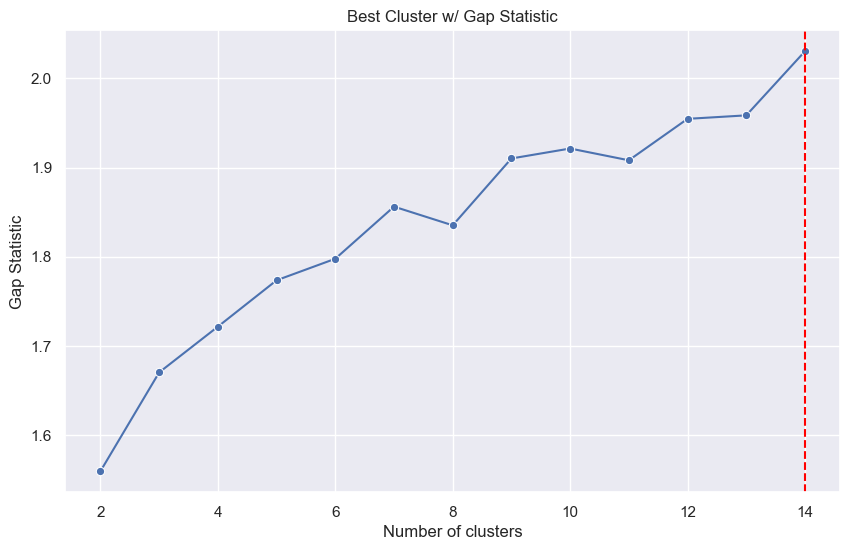

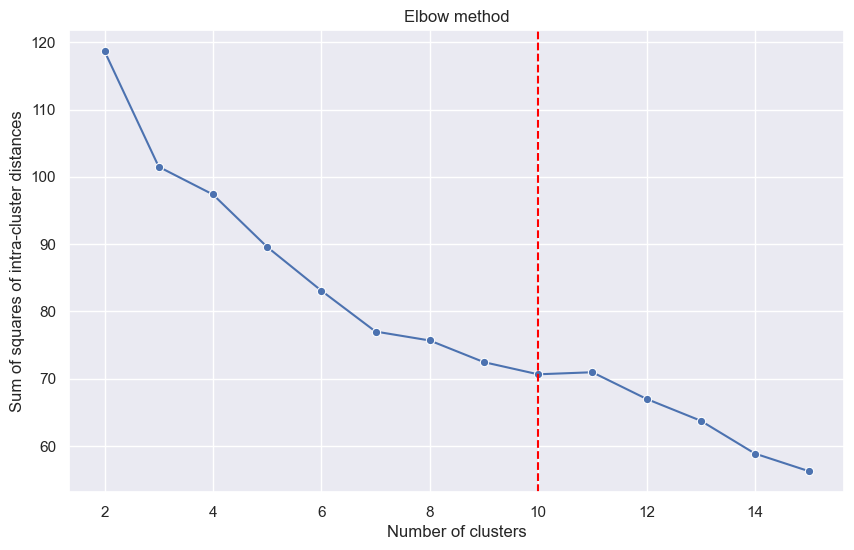

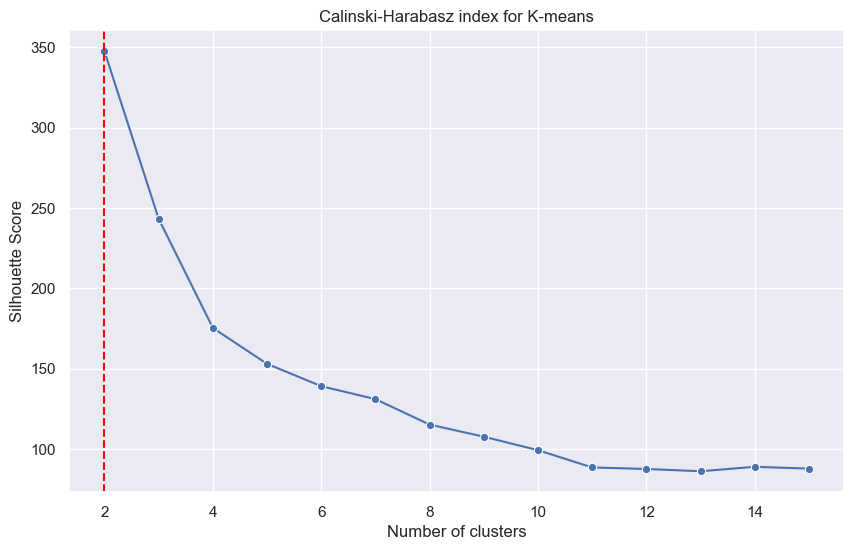

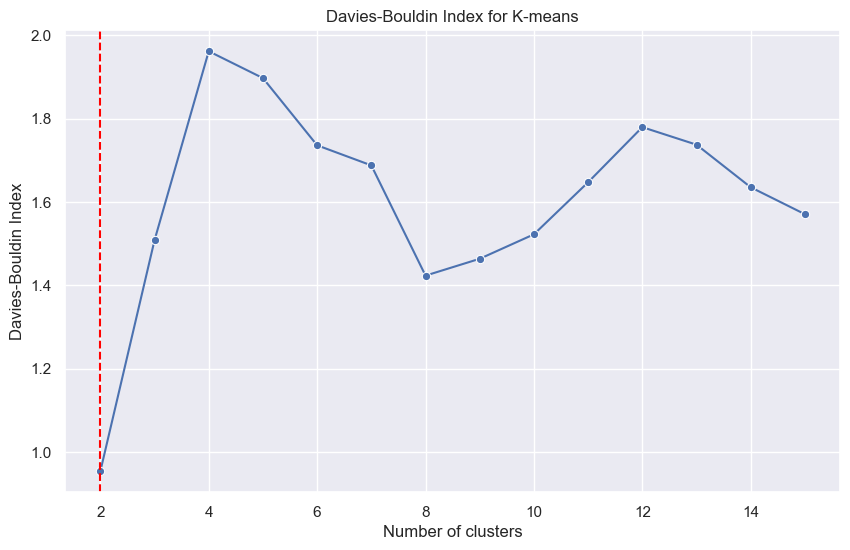

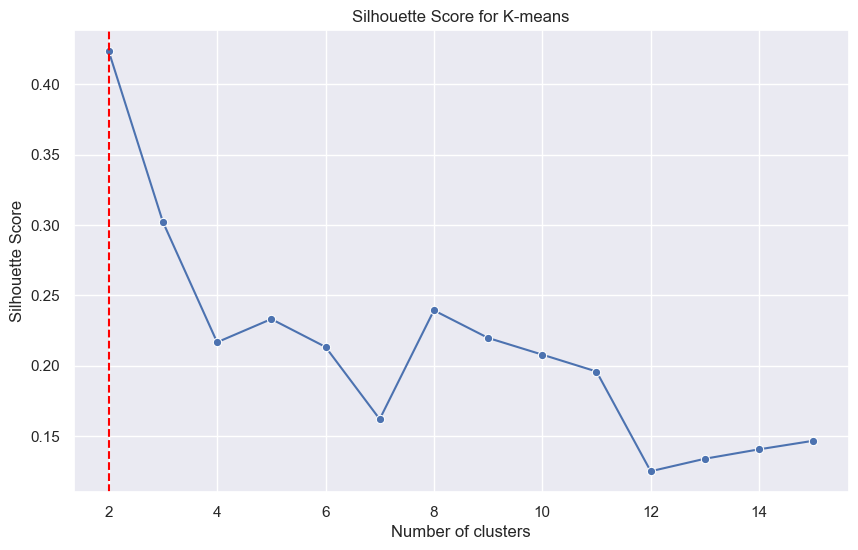

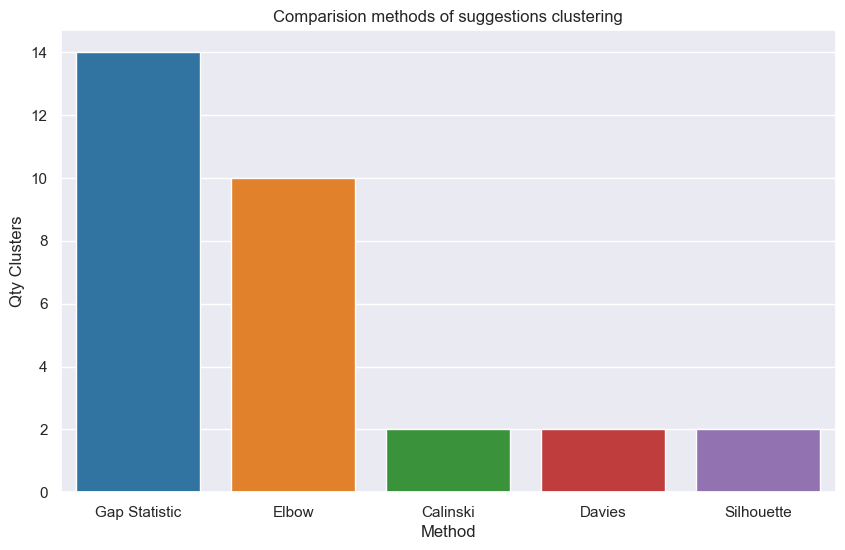

In [7]:

MIN_CLUSTERS = 2
MAX_CLUSTERS = 15

suggestions = get_grouping_suggestions(df_processed, MIN_CLUSTERS,
                                       MAX_CLUSTERS)


In [8]:
display(suggestions[0])

,method,qty_clusters
0,Gap Statistic,14.0
1,Elbow,10.0
2,Calinski,2.0
3,Davies,2.0
4,Silhouette,2.0


In [9]:
from src.smart_k_means import evaluate_cluster

cluster_suggestions = set(
  suggestions[0]['qty_clusters'].astype(int).values.tolist())

cluster_evaluations = [
  evaluate_cluster(df_processed, k)
  for k in
  cluster_suggestions]

df_evaluates = pd.DataFrame(cluster_evaluations,
                            columns=['cluster', 'num_clusters',
                                     'silhouette_score'])
df_evaluates

,cluster,num_clusters,silhouette_score
0,10 groups,10,0.151253
1,2 groups,2,0.423558
2,14 groups,14,0.144787


In [10]:
evaluate_cluster(df_processed, 10)

{'cluster': '10 groups',
 'num_clusters': 10,
 'labels': array([4, 8, 4, 8, 8, 9, 4, 4, 4, 9, 9, 9, 9, 3, 3, 3, 3, 8, 8, 3, 4, 0,
        0, 0, 4, 4, 0, 0, 0, 4, 9, 4, 0, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4,
        0, 0, 0, 6, 4, 8, 4, 4, 8, 8, 4, 7, 7, 7, 4, 8, 8, 4, 4, 4, 7, 7,
        7, 7, 0, 0, 4, 0, 7, 7, 7, 0, 7, 8, 7, 0, 4, 0, 0, 3, 3, 2, 0, 7,
        7, 4, 4, 4, 8, 8, 0, 0, 0, 0, 0, 0, 3, 0, 4, 8, 3, 4, 3, 2, 0, 4,
        8, 0, 6, 1, 1, 5, 1, 1, 5, 5, 5, 6, 6, 2, 2, 6, 3, 2, 2, 0, 4, 0,
        4, 4, 4, 0, 2, 4, 2, 2, 6, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 6, 1, 1, 2, 4, 0, 0, 4, 4, 4,
        4, 4, 8, 7, 8, 4, 8, 3, 7, 4, 6, 2, 0, 0, 0, 4, 4, 3, 4, 4, 8, 8,
        8, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0,
        0, 2, 0, 2, 6, 0, 0, 8, 5, 1, 5, 5, 0, 1, 1, 1, 4, 6, 6, 7, 1, 0,
        0, 4, 5, 2, 1, 5, 5, 0, 1, 1, 1, 1, 1, 1, 2, 2, 

For n_clusters = 10 The average silhouette_score is : 0.15


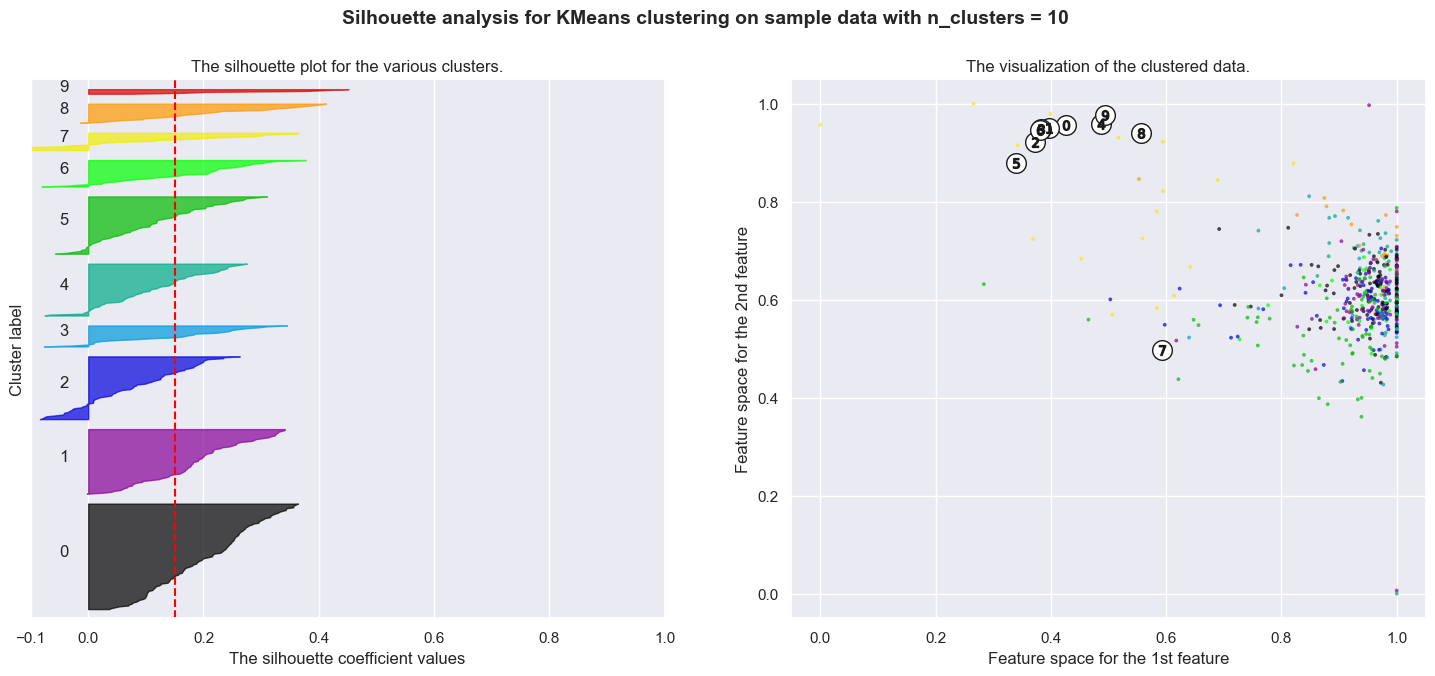

For n_clusters = 2 The average silhouette_score is : 0.42


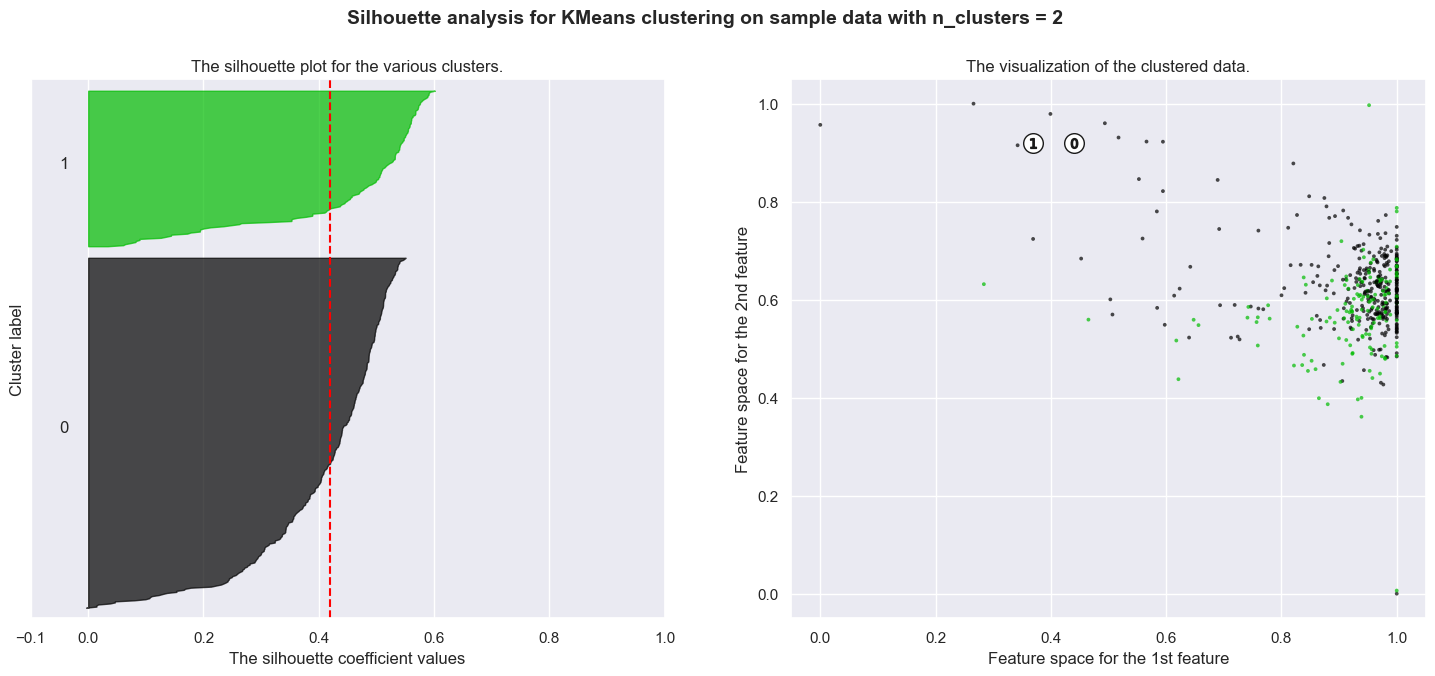

For n_clusters = 14 The average silhouette_score is : 0.14


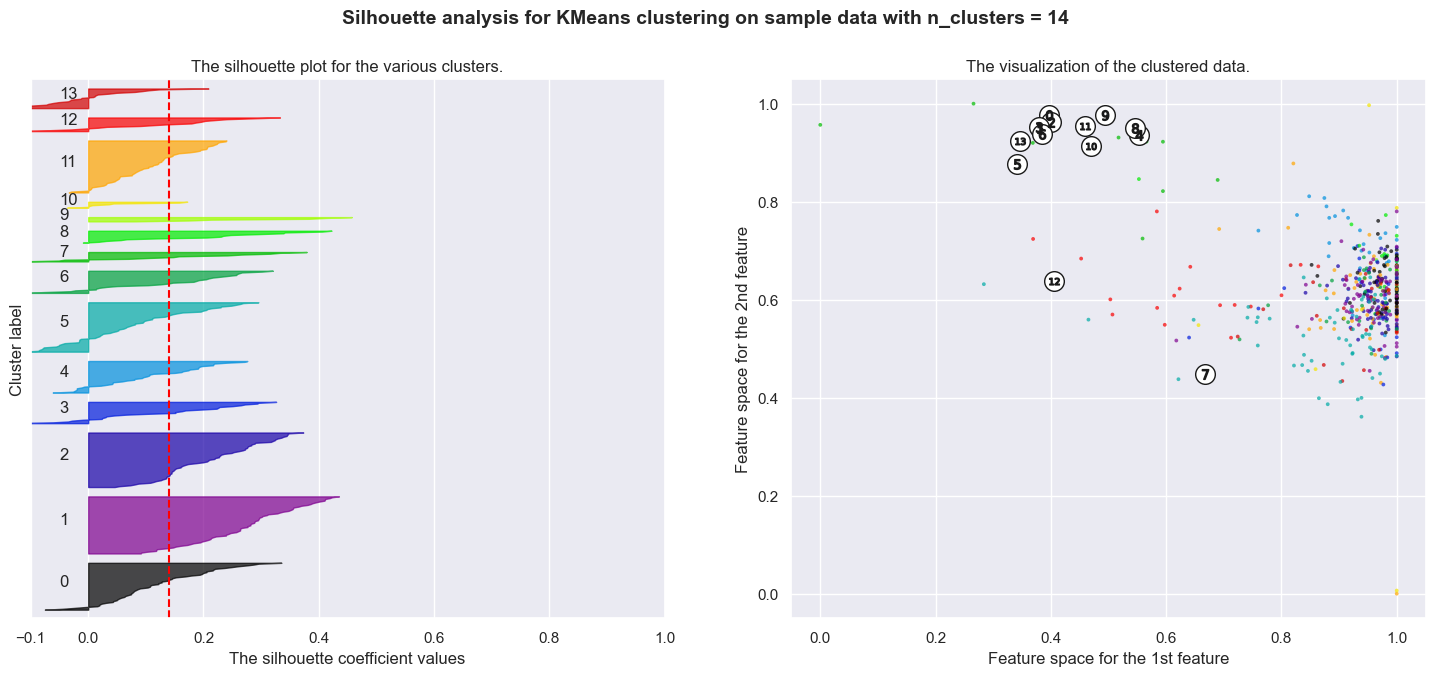

In [11]:
from src.smart_k_means import evaluate_grouping_options, \
  get_grouping_analysis_graph

for k in cluster_suggestions:
  classification = evaluate_grouping_options(df_processed, k, k)
  get_grouping_analysis_graph(classification[0], df_processed)

### Principal Component Analysis (PCA)

In [12]:
# PCA is used to understand which variables explain most of the variance
# in the data, identifying the most influential indicators.

ranking = calculate_pca(df_processed)
ranking_chart = px.bar(
  x=ranking.index,
  y=ranking["PC1_abs"],
  title="Variable Ranking by Influence on PC1"
)
ranking_chart.show()

### Entropy evaluation of dataset variables

In [13]:
entropies = []
columns_list = df_processed.columns.tolist()

for col in columns_list:
  entropies.append(
    {
      "subindicator": col,
      "entropy": calculate_shannon_entropy(df_processed[col].round(10)),
    }
  )

df_entropies = pd.DataFrame(entropies)
df_entropies.sort_values(by="entropy", ascending=True, inplace=True)

px.bar(
  df_entropies,
  x="entropy",
  y="subindicator",
  color="entropy",
  color_continuous_scale="sunset",
  text_auto=True,
  title="Subindicators Entropy"
)

In [14]:
df_entropies

,subindicator,entropy
9,2010_VH1,2.090720
7,2010_VED1,3.579912
12,2010_VH4,4.239677
5,2010_VE2,4.346313
0,2010_VD1,6.420778
1,2010_VD2,6.664482
10,2010_VH2,6.798749
3,2010_VD4,7.035503
11,2010_VH3,8.160091
8,2010_VED2,8.274006
